In [2]:
#두개의 list 를 빠짐 없이 element 별로 곱하여 새로운 list 생성
alist = [1, 2, 3, 4]
blist = [5, 6, 7, 8]

result = []

for a in alist:
    for b in blist:
        result.append(a * b)
        
result

[5, 6, 7, 8, 10, 12, 14, 16, 15, 18, 21, 24, 20, 24, 28, 32]

In [9]:
alist = [1, 2, 3, 4]
blist = [5, 6, 7, 8]

result = [(x*y) for x in alist for y in blist]
result 

[5, 6, 7, 8, 10, 12, 14, 16, 15, 18, 21, 24, 20, 24, 28, 32]

In [10]:
# 번호를 key로 갖고 이름을 value로 가지는 dictionary 만들기
students = ['몽키', '선샤인', '시와', '톰']
students_dic = {}

for i, name in enumerate(students):
    students_dic[i] = name

print(students_dic)

{0: '몽키', 1: '선샤인', 2: '시와', 3: '톰'}


In [11]:
lc_dict = {i: name for i, name in enumerate(students)}

print(lc_dict)

{0: '몽키', 1: '선샤인', 2: '시와', 3: '톰'}


In [23]:
# zip 을 활용하여 두개의 list 를 key, value 로 dictionary 만들기
students = ['몽키', '선샤인', '시와', '톰']
scores = [85, 92, 78, 100]

score_dic = {name : i for name, i in zip(students,scores)}

print(score_dic)



{'몽키': 85, '선샤인': 92, '시와': 78, '톰': 100}


In [24]:
#1~10 사이 홀수를 50~60 사이 짝수와 곱한 숫자들의 list 생성
result = []
alist = []
blist = []

for i in range(1, 11):
    if i % 2 == 1:
        alist.append(i)
for i in range(50, 61):
    if i % 2 == 0:
        blist.append(i)
        
for a, b in zip(alist, blist):
    result.append(a * b)
    
print(result)

[50, 156, 270, 392, 522]


In [29]:
list(filter(lambda x:x%2 == 1, range(1,11))) #1~10 사이 홀수
list(filter(lambda x:x%2 == 0, range(50,61))) #50~60 사이 짝수

[50, 52, 54, 56, 58, 60]

In [28]:
#map, filter, lambda 를 이용하여 위 문제 해결
c = map(lambda x, y: x*y, filter(lambda x:x%2 == 1, range(1,11)), filter(lambda x:x%2 == 0, range(50,61)))
print(list(c))

[50, 156, 270, 392, 522]


In [35]:
#List Comprehension 을 사용하여 해결
print([x * y for x, y in zip([x for x in range(1,11) if x%2==1],[y for y in range(50,61) if y%2==0])])

[50, 156, 270, 392, 522]


In [50]:
# 피보나치 알고리즘

# 1.일반적인 재귀호출 법
def flb(n):
    if n in (1,2):
        return 1
    return flb(n-1) + flb(n-2)

In [51]:
%timeit flb(32)

525 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
# 2.Memoization (메모이제이션)

memo = dict()

def flb2(n):
    if n in memo:
        return memo[n]
    
    if n in (1,2):
        memo[n] = 1
        return 1
    
    result = flb2(n-1) + flb2(n-2)
    
    memo[n] = result
    
    return result

#print(flb2(64))

In [53]:
%timeit (flb2(32))

132 ns ± 0.269 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [54]:
# 이항 계수 알고리즘 : 주어진 크기의 (순서 없는) 조합의 가짓수
 
# 1. 일반적인 점화식 표현
def bino(n,k):
    if k==0 or k==n:
        return 1
    return bino(n-1,k-1) + bino(n-1,k)

print(bino(5,3))

10


In [65]:
# 2. Memoization (메모이제이션)

memo = {}

def bino2(n,k):
    cache = [[0 for _ in range(k+1)] for _ in range(n+1)]  #2차원배열

    for i in range(n+1):
        cache[i][0] = 1   # n개 중 하나도 안뽑는 경우의 수 = 1
    for i in range(k+1):
        cache[i][i] = 1   # k 개중 k 개를 뽑는 경우의 수 = 1

    for i in range(1, n+1):
        for j in range(1, k+1):
            cache[i][j] = cache[i-1][j-1] + cache[i-1][j]
    return cache[n][k]

#print(bino2(5,3))

In [63]:
%timeit bino(30,20)

8.26 s ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
%timeit bino2(30,20)

145 µs ± 279 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [78]:
arr = [45,9,5,1,345,566,23.455,84,120]
len(arr)

5

In [76]:
# 버블정렬 알고리즘
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr)-1-i):   #j 와 j+1 을 비교하므로 -1 을 해준다
            if arr[j] > arr[j+1]:        # compare and swap
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
    return arr

bubble_sort(arr)

[0, 1, 5, 9, 45]

In [2]:
# selection sort 알고리즘
import random
def selection_sort(arrb):
    for i in range(len(arrb)-1, 0, -1):
        maxidx = 0
        for j in range(i+1):
            if arrb[j] > arrb[maxidx]:
                maxidx = j
        arrb[j], arrb[maxidx] = arrb[maxidx], arrb[i]
    return arrb

selection_sort([random.randrange(1,100) for _ in range(100)])

In [15]:
# merge sort 알고리즘
def merge_sort(arrc):
    if len (arrc) == 1:
        return arrc
    
    leftRtn = arrc[:int(len(arrc)/2)]
    rightRtn = arrc[int(len(arrc)/2):]
    
    leftRtn = merge_sort(leftRtn)
    rightRtn = merge_sort(rightRtn)
    
    c = []
    i = 0
    j = 0
    
    while i < len(leftRtn) and j < len(rightRtn):
        if leftRtn[i] < rightRtn[j]:
            c.append(leftRtn[i])
            i += 1
        else:
            c.append(rightRtn[j])
            j += 1
    
    c += leftRtn[i:]
    c += rightRtn[j:]
    return c
       
    
merge_sort([random.randrange(1,10) for _ in range(10)])

[1, 2, 3, 4, 5, 5, 7, 8, 8, 9]

In [18]:
# quick sort 알고리즘

def qsort(qlist):
    lower = []
    higher = []
    sorted_list = []
    
    if len(qlist) < 1:
        return  # None returned
    
    center = qlist[0]  # pivot 을 정함
    
    for element in qlist[1:]:    # pivot 보다 작으면 lower 에 크련 higher 에 append
        if element <= center:
            lower.append(element)
        else:
            higher.append(element)
            
        lower = qsort(lower)   #재귀 호출
        
        if lower != None: #이미 sort 된 lower 부분이 return 되므로 단순히 concatenate
            sorted_list += lower
        
        sorted_list.append(center)  # pivot (중간) element 를 append
        
        higher = qsort(higher) # 이미 sort 된 higher 부분이 return 되므로 단순히 concatenate
        if higher != None:
            sorted_list += higher
            
        return sorted_list   #concatenate 된 list 반환
    

qsort([random.randrange(1,10000) for _ in range(10000)])

[8942]

In [21]:
# sample file 생성

f = open('test4.txt','w')
f.write('4번째 압축 파일')
f.close()

In [27]:
import zipfile

compressed = zipfile.ZipFile('compressed.zip', 'w')  #zip object 생성

compressed.write('test.txt')

In [31]:
compressed.write('test4.txt')

In [34]:
# Python 를 이용한 Graph 구현

# __iter__ : iterable object 반환
class Asset:
    def __init__(self, values=None):
        if values is None:
            self.values = []
        else:
            self.values = values
    
    def __iter__(self):
        return iter(self.values)
    
a = Asset([1,3,5,7])

print(a) 

for n in a:
    print(n)

1
3
5
7


In [48]:
class Graph:
    def __init__(self):
        self.adjList = {}  #인접한 이웃 node List
    
    def __iter__(self):
        return iter(self.adjList.items()) #인접한 이웃 node list iterable object 반환
    
    def add_vertex(self, vertex): #정점 (=Node) 추가
        if not vertex in self.adjList:
            self.adjList[vertex] = []   #새로이 추가된 node 에는 아직 edge 가 없음
            
    def add_edge(self, v1, v2, weight):  # 새로운 Edge 추가 (이웃 node 와 가중치)
        self.adjList[v1].append({'node':v2, 'weight':weight})
        self.adjList[v2].append({'node':v1, 'weight':weight})

In [54]:
g = Graph()

g.add_vertex('a')
g.add_vertex('b')
g.add_vertex('c')
g.add_vertex('d')
g.add_vertex('e')
g.add_vertex('f')

g.add_edge('a','b',7)
g.add_edge('a','c',9)
g.add_edge('a','f',14)
g.add_edge('b','c',10)
g.add_edge('b','d',15)
g.add_edge('c','d',11)
g.add_edge('c','f',2)
g.add_edge('d','e',6)
g.add_edge('e','f',9)

for node in g:
    print(node)


('a', [{'node': 'b', 'weight': 7}, {'node': 'c', 'weight': 9}, {'node': 'f', 'weight': 14}])
('b', [{'node': 'a', 'weight': 7}, {'node': 'c', 'weight': 10}, {'node': 'd', 'weight': 15}])
('c', [{'node': 'a', 'weight': 9}, {'node': 'b', 'weight': 10}, {'node': 'd', 'weight': 11}, {'node': 'f', 'weight': 2}])
('d', [{'node': 'b', 'weight': 15}, {'node': 'c', 'weight': 11}, {'node': 'e', 'weight': 6}])
('e', [{'node': 'd', 'weight': 6}, {'node': 'f', 'weight': 9}])
('f', [{'node': 'a', 'weight': 14}, {'node': 'c', 'weight': 2}, {'node': 'e', 'weight': 9}])


In [40]:
import networkx as nx
import matplotlib

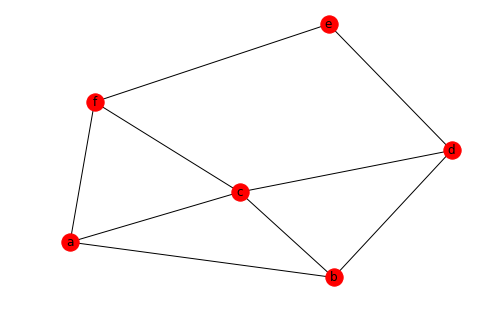

In [52]:
g = nx.Graph()

g.add_edge('a','b')
g.add_edge('a','c')
g.add_edge('a','f')
g.add_edge('b','c')
g.add_edge('b','d')
g.add_edge('c','d')
g.add_edge('c','f')
g.add_edge('d','e')
g.add_edge('e','f')

nx.draw(g, with_labels=True)

In [84]:
def connect(a,b,c):
    q = []
    def dist(x,y):
        for n in g.adjList[x]:
            print(n['node'])
            
    return dist(a,b) + dist(b,c)

In [85]:
connect('a','b','c')

b
c
f
a
c
d


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'